In [36]:
import seaborn as sns
from matplotlib import pyplot as plt
from os import path
import pandas as pd

In [37]:
lrs = ["1e-3", "5e-5"]

folders = [
    # lr 1e-3
    {
        "training_results_steel_memory/steel-simplefcn-lr-0.001/": "SimpleFCN",
        "training_results_steel_memory/steel-unet_v2-lr-0.001/": "Mini U-Net",
        "training_results_steel_memory/steel-unet_paper-lr-0.001/":"U-Net"
    },

    {
        "training_results_steel_memory/steel-simplefcn-lr-5e-05/": "SimpleFCN",
        "training_results_steel_memory/steel-unet_v2-lr-5e-05/": "Mini U-Net",
        "training_results_steel_memory/steel-unet_paper-lr-5e-05/":"U-Net"
    }
]

In [38]:
series = []
classes = []
shapes = []

for shape_ind, folder_set in enumerate(folders):
    for dirpath, name in folder_set.items():
        with open(path.join(dirpath, "train_losses.txt")) as tl:
            losses = [float(x) for x in tl.readlines()]
        
        series.append(losses)
        classes.append(name)
        shapes.append(["solid", "dashdot"][shape_ind])

colors = [{
    "SimpleFCN": "red",
    "Mini U-Net": "blue",
    "U-Net":"green"
}[cl] for cl in classes]

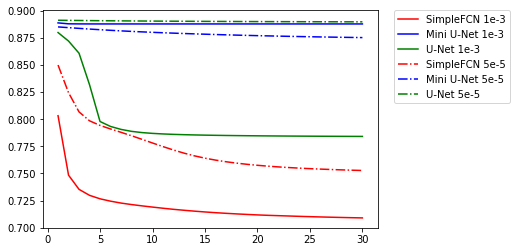

In [66]:
for i in range(len(series)):
    sns.lineplot(x =[x for x in range(1, len(series[i])  + 1)],
                 y = series[i], color = colors[i], linestyle = shapes[i])

plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left', borderaxespad=0.,
           labels = ["SimpleFCN 1e-3", "Mini U-Net 1e-3", "U-Net 1e-3", "SimpleFCN 5e-5", "Mini U-Net 5e-5", "U-Net 5e-5"])


ValueError: Unrecognized linestyle: ['solid', 'solid', 'solid', 'dashdot', 'dashdot', 'dashdot']

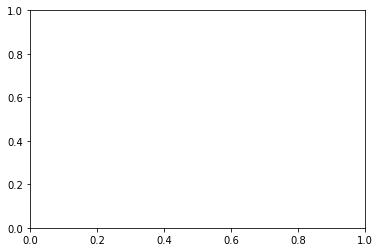

In [61]:
sns.lineplot(data = series, linestyle = shapes, color = colors)

In [49]:
n = len(series)
dfs = []
for i in range(n):
    df = pd.DataFrame()
    df["x"] = [x for x in range(1, len(series[i])+ 1)]
    df["y"] = series[i]
    df["group"] = classes[i]
    df["series_no"] = i
    df["shape"] = shapes[i]
    dfs.append(df)

df = pd.concat(dfs)

In [50]:
print(df)

     x         y      group  series_no    shape
0    1  0.803314  SimpleFCN          0    solid
1    2  0.748460  SimpleFCN          0    solid
2    3  0.735363  SimpleFCN          0    solid
3    4  0.729847  SimpleFCN          0    solid
4    5  0.726650  SimpleFCN          0    solid
..  ..       ...        ...        ...      ...
25  26  0.890024      U-Net          5  dashdot
26  27  0.890003      U-Net          5  dashdot
27  28  0.889983      U-Net          5  dashdot
28  29  0.889964      U-Net          5  dashdot
29  30  0.889947      U-Net          5  dashdot

[180 rows x 5 columns]


ValueError: cannot reindex from a duplicate axis

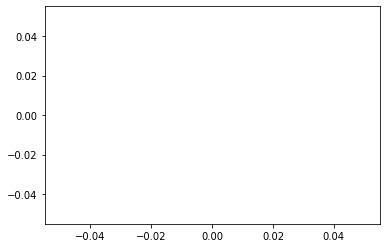

In [53]:
sns.lineplot(data = df, x = "x", y = "y", hue = "series_no", style = "shape")
plt.title("M2NIST Loss Curves")
plt.ylabel("Dice Loss")
plt.xlabel("Epoch")